<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-14-Techniques-for-Detecting-Outliers-Anomalies-and-Behavioral-Changes/blob/main/Chapter_14_Techniques_for_Detecting_Outliers%2C_Anomalies_and_Behavioral_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supplemental Example: Anomaly Detection in CO2 Emissions: Univariate Anomaly Detection in Global CO₂ Emissions using the Median Absolute Deviation (MAD)**

**1.	Load the Global CO₂ Emissions dataset and isolate the 'Year' and 'CO₂ Emissions' columns.**

In [1]:
import pandas as pd
Co2_df = pd.read_csv('owid-co2-data.csv')
Co2_df = Co2_df[['year', 'co2']]

**2.	Select the relevant columns and group by year:**

In [2]:
Co2_df = Co2_df.groupby('year')['co2'].sum().reset_index()

Here, we first select the 'year' and 'co2' columns from the DataFrame. Then, we group the data by the 'year' column and compute the sum of CO₂ emissions for each year. The 'reset_index()' function is called to move the 'year' index back to a regular column.

**3.	Calculate the median CO₂ emissions value and the Median Absolute Deviation (MAD): Compute the absolute deviations from the median for each data point.**

In [3]:
median_value = Co2_df['co2'].median()
Co2_df['Absolute Deviation'] = abs(Co2_df['co2'] - median_value)
mad = Co2_df['Absolute Deviation'].median()

This phase computes the average CO2 emissions value over all years. The absolute deviation of each data point from the median value is then computed. Finally, the Median Absolute Deviation (MAD) is computed as the arithmetic mean of these absolute deviations.

**4.	Calculate the scaled MAD for each data point, set a threshold, and identify anomalies**

In [4]:
threshold = 3
Co2_df['Scaled MAD'] = Co2_df['Absolute Deviation'] / mad
Co2_df['Anomaly'] = Co2_df['Scaled MAD'] > threshold
anomalies = Co2_df[Co2_df['Anomaly']]


In this step, we calculate the scaled MAD for each data point by dividing the absolute deviation by the MAD. We then set a threshold value (e.g., 3) and identify the data points with a scaled MAD greater than the threshold as anomalies.

**5.	Create a scatter plot of the annual CO₂ emissions and overlay the anomalous data points.**

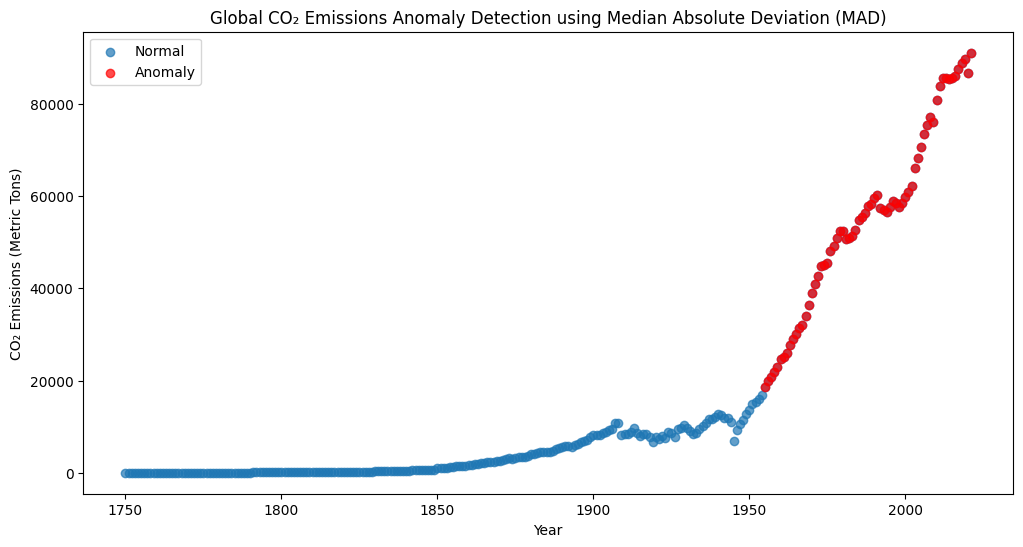

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(Co2_df['year'], Co2_df['co2'], label='Normal', alpha=0.7)
plt.scatter(anomalies['year'], anomalies['co2'], color='red', label='Anomaly', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Metric Tons)')
plt.title('Global CO₂ Emissions Anomaly Detection using Median Absolute Deviation (MAD)')
plt.legend()
plt.show()

# **Example: Univariate Anomaly Detection in Credit Card Transactions using Tukey's Fences and Visualization**

**1. Let's start by loading the dataset and inspecting the first few rows to understand its structure and column names.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv('synthetic_card_transactions.csv')

# Check the first few rows of the dataframe to understand its structure and column names
data_df.head()


,Transaction Index,Amount
0,1,124.835708
1,2,93.086785
2,3,132.384427
3,4,176.151493
4,5,88.292331


The dataset contains two columns: 'Transaction Index' and 'Amount'. It seems the column that contains the transaction amounts is labeled 'Amount' and does not include commas, so you won't need to clean the column.

In [2]:
# Remove commas and convert 'Trans_Amount' to a numeric type
#data_df['Trans_Amount'] = data_df['Trans_Amount'].str.replace(',', '').astype(float)

# Confirm the changes
#data_df['Trans_Amount'].head()


**2. Now, let's proceed with calculating the quartiles, IQR, and identifying any potential anomalies. After that, you'll visualize the results with a scatter plot.**

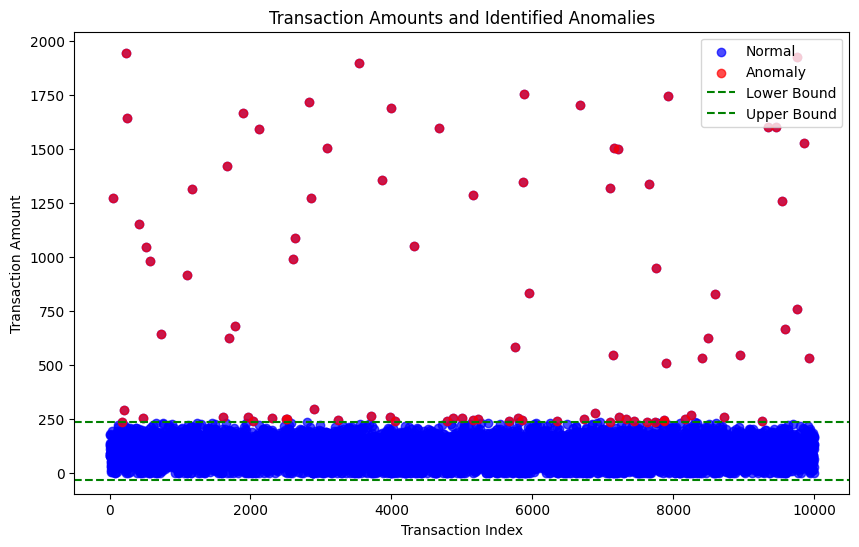

87

In [5]:
# Since the 'Amount' column is already in the correct format, we can proceed with the calculations

# Calculate the quartiles and IQR for the 'Amount' column
new_Q1 = data_df['Amount'].quantile(0.25)
new_Q3 = data_df['Amount'].quantile(0.75)
new_IQR = new_Q3 - new_Q1

# Determine bounds for potential anomalies
new_lower_bound = new_Q1 - 1.5 * new_IQR
new_upper_bound = new_Q3 + 1.5 * new_IQR

# Identify transactions with amounts outside the defined bounds as potential anomalies
new_anomalies = data_df[(data_df['Amount'] < new_lower_bound) | (data_df['Amount'] > new_upper_bound)]

# Visualize the transaction amounts and the identified anomalies using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Transaction Index'], data_df['Amount'], label='Normal', alpha=0.7, color='blue')
plt.scatter(new_anomalies['Transaction Index'], new_anomalies['Amount'], color='red', label='Anomaly', alpha=0.7)
plt.axhline(new_lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(new_upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts and Identified Anomalies')
plt.legend()
plt.show()

# Count the number of identified anomalies with the 1.5*IQR threshold
new_anomaly_count = new_anomalies.shape[0]
new_anomaly_count


This code will generate a scatter plot (see Figure 14-2.) of the transaction amounts with normal data points in blue and anomalous data points in red. You can adjust the multiplier for the IQR (e.g., 1.5, 3) to identify more or fewer anomalous data points based on your analysis requirements.

# **Example: Fraud Detection using Peer-Group Analysis**

**1-	To read the "account_summary.csv" file, you can use the read_csv() function from the pandas library. Here's an example of how to do this**

In [34]:
# Now that we have the CSV file, let's load the dataset and perform the fraud detection analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
account_summary = pd.read_csv('account_summary.csv')

# Check if the DataFrame is empty after loading
if account_summary.empty:
    raise ValueError("The initial DataFrame is empty. Check the CSV file.")

# Display the initial DataFrame
account_summary.head()


,account_id,num_transactions,total_amount,avg_amount,std_amount
0,1,9,"6,090",677,301
1,2,10,"5,980",598,238
2,3,7,"3,253",465,227
3,4,5,"1,520",304,207
4,5,3,"1,053",351,245


**2- Data Preparation: Cleaning Column Names and Converting Data Types**

- Standardize Column Names: Clean the column names by stripping whitespace, converting to lowercase, and replacing spaces and hyphens with underscores for consistent referencing.

- Convert Data Types: Change the total_amount column to a numeric type, removing any commas that would prevent numerical operations.

In [35]:
# Clean up the column names by removing leading/trailing spaces and replacing spaces with underscores
account_summary.columns = account_summary.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Convert the 'total_amount' column to numeric, making sure to remove commas
account_summary['total_amount'] = pd.to_numeric(account_summary['total_amount'].str.replace(',', ''), errors='coerce')

#These steps are crucial for data integrity and to prevent errors in subsequent data analysis and manipulation.
#They are a standard part of the data cleaning process, which should be done before performing any data analysis.

**3-	Calculate summary statistics for each account**

- Aggregate Data: Group the data by account_id and calculate sum, mean, and standard deviation for relevant columns.

- Reset Index: Reset the index of the resulting DataFrame to turn the groupby columns back into regular columns.

In [36]:
# Calculate summary statistics for each account
summary_stats = account_summary.groupby('account_id').agg(
    total_amount=pd.NamedAgg(column='total_amount', aggfunc='sum'),
    avg_amount=pd.NamedAgg(column='avg_amount', aggfunc='mean'),
    std_amount=pd.NamedAgg(column='std_amount', aggfunc='mean'),
    num_transactions=pd.NamedAgg(column='num_transactions', aggfunc='sum')
).reset_index()


# Check the data types of the columns in the `summary_stats` DataFrame
summary_stats.dtypes


account_id            int64
total_amount          int64
avg_amount          float64
std_amount          float64
num_transactions      int64
dtype: object

**4-	Ensure that zero standar deviation cloumn not contains zero values**

- Replace Zeros: Replace zero values in the std_amount column with NaN to avoid division by zero during calculations.

- Drop NaNs: Remove rows where std_amount is NaN as these would not be useful for further analysis.

In [37]:
# Ensure there are no zero standard deviation values
summary_stats['std_amount'].replace(0, np.nan, inplace=True)
summary_stats['std_amount'] = summary_stats['std_amount'].apply(lambda x: x if x > 0 else np.nan)
summary_stats.dropna(subset=['std_amount'], inplace=True)

**5-	Define the calculate_distance function**

- Distance Calculation: Define a function to calculate the 'distance' of each transaction, using z-score to identify how many standard deviations away from the mean a value is.

In [38]:
# Define the function to calculate distance (z-score based anomaly detection)
def calculate_distance(transaction, summary_stats):
    account = transaction['account_id']
    stats = summary_stats[summary_stats['account_id'] == account].iloc[0]

    z_score = (transaction['total_amount'] - stats['avg_amount']) / stats['std_amount']
    distance = np.sqrt(z_score ** 2) # Euclidean distance, but since it's 1D it's just the absolute value of the z-score
    return distance

**6-	Calculate distances for each transaction and define threshold**

- Apply Function: Apply the calculate_distance function to each transaction to get the distance.

- Drop NaN Distances: Remove transactions with NaN distances as they can't be analyzed.

- Set Threshold: Determine the 75th percentile of the distance values to use as a cutoff for potential fraud.
Flag Potential Fraud: Create a new column to flag transactions above this threshold as potential fraud.

In [41]:
# Apply the distance calculation to each transaction
account_summary['distance'] = account_summary.apply(lambda x: calculate_distance(x, summary_stats), axis=1)

# Drop transactions with NaN distances
account_summary.dropna(subset=['distance'], inplace=True)

# Define a threshold at the 75th percentile of the distances
threshold = account_summary['distance'].quantile(0.75)

# Flag transactions with distances greater than the threshold as potential fraud
account_summary['potential_fraud'] = account_summary['distance'] > threshold

**7-	Visualize and print the results**

- Visualize Data: Use seaborn to create a scatter plot of transactions, highlighting potential fraud cases.

- Print Threshold and Fraud Count: Output the threshold value and the count of transactions flagged as potential fraud.

- Filter for Fraud: Extract and display rows from the DataFrame that are flagged as potential fraud.

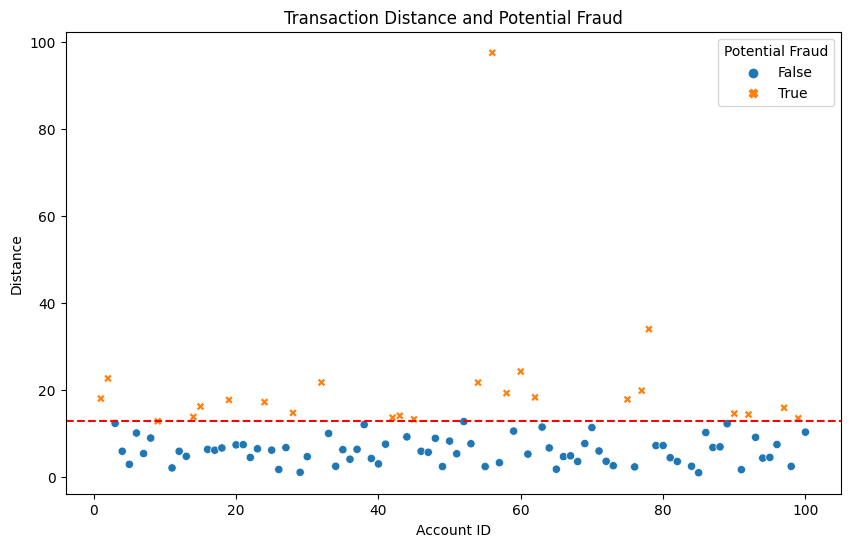

Threshold value: 12.714711214711215
Number of transactions flagged as potential fraud: 24


,account_id,num_transactions,total_amount,avg_amount,std_amount,distance,potential_fraud
0,1,9,6090,677,301,17.983389,True
1,2,10,5980,598,238,22.613445,True
8,9,7,4422,632,297,12.760943,True
12,14,5,3576,715,208,13.754808,True
13,15,8,4338,542,235,16.153191,True
17,19,7,4515,645,219,17.671233,True
22,24,9,5237,582,271,17.177122,True
26,28,5,3436,687,187,14.700535,True
29,32,8,5109,639,206,21.699029,True
39,42,6,3229,538,198,13.590909,True


In [42]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=account_summary, x='account_id', y='distance', hue='potential_fraud', style='potential_fraud')
plt.axhline(y=threshold, color='red', linestyle='--')
plt.title('Transaction Distance and Potential Fraud')
plt.xlabel('Account ID')
plt.ylabel('Distance')
plt.legend(title='Potential Fraud')
plt.show()

# Get the number of transactions flagged as potential fraud and the potential fraud transactions
fraud_count = account_summary['potential_fraud'].sum()
potential_fraud_transactions = account_summary[account_summary['potential_fraud']].copy()  # Using .copy() to avoid SettingWithCopyWarning

(fraud_count, potential_fraud_transactions[['account_id', 'total_amount', 'distance', 'potential_fraud']])

# Print the threshold value and number of transactions flagged as potential fraud
print("Threshold value:", threshold)
print("Number of transactions flagged as potential fraud:", account_summary['potential_fraud'].sum())

# Filter the DataFrame to show only the potential fraud transactions
potential_fraud_transactions = account_summary[account_summary['potential_fraud'] == True]

# Display all the potential fraud transactions
potential_fraud_transactions